**Zadanie 1.**
<br><br>
$ f(x) = e^{-2x}$, $\int_{0}^{1}f(x)dx$
1. metoda analityczna: <br>
$\int_{}^{} e^{-2x} dx = -\dfrac{1}{2}e^{-2x} + C\\
\int_{0}^{1}f(x)dx = -\dfrac{1}{2}e^{-2} - (-\dfrac{1}{2}e^{0}) \approx 0.43233235838$
2. metoda prostokątów:

In [69]:
import math

f = lambda x: math.e**(-2*x)

prostokaty = lambda f,a,b: (b-a) * f(a+0.5*(b-a))

print("Metoda prostokątów:",prostokaty(f,0,1))

Metoda prostokątów: 0.36787944117144233


    3. metoda prostego wzoru trapezów:

In [70]:
trapezy = lambda f,a,b: (b-a)*0.5*(f(a)+f(a+(b-a)))

print("Metoda prostego wzoru trapezów:",trapezy(f,0,1))

Metoda prostego wzoru trapezów: 0.5676676416183064


    4. metoda prostego wzoru Simpsona:

In [71]:
simpson = lambda f,a,b: (b-a)/6 *(f(a) + 4*f(a+0.5*(b-a)) + f(b))

print("Metoda prostego wzoru Simpsona:",simpson(f,0,1))

Metoda prostego wzoru Simpsona: 0.4344755079870637


    5. metoda złożonego wzoru trapezów:

In [76]:
def zloz_trapezy(f,a,b,n = 10):
    sum = 0
    h = (b-a)/n
    while ((a + h) < b):
        sum += trapezy(f,a,a+h)
        a += h
    sum += trapezy(f,a,b)
    return sum

print("Metoda złożonego wzoru trapezów:",zloz_trapezy(f,0,1))

Metoda złożonego wzoru trapezów: 0.43377250641846693


    6. metoda złożonego wzoru Simpsona:

In [77]:
def zloz_simpson(f,a,b,n = 10):
    sum = 0
    h = (b-a)/n
    while ((a + h) < b):
        sum += simpson(f,a,a+h)
        a += h
    sum += simpson(f,a,b)
    return sum

print("Metoda złożonego wzoru Simpsona:",zloz_simpson(f,0,1))

Metoda złożonego wzoru Simpsona: 0.43233259828070303


    7. metoda Romberga:

In [74]:
from scipy.integrate import romberg

print("Metoda Romberga:", romberg(f,0,1))

Metoda Romberga: 0.43233235838169437


    8. metoda scipy.integrate.quad:

In [75]:
from scipy.integrate import quad
result,_ = quad(f,0,1)
print("Metoda scipy.integrate.quad:", result)

Metoda scipy.integrate.quad: 0.4323323583816936


Z metod 2-6 najbliższa wynikowi analitycznemu jest metoda złożonego wzoru Simpsona.

**Zadanie 2.**

In [62]:
from scipy.stats import norm
from scipy.optimize import newton

df = lambda t : (math.e**(-(t**2)/2))/(math.sqrt(2*math.pi))
f = lambda x: zloz_trapezy(df,0,x) - 0.45
p0 = 0.5
print("Z użyciem złożonego wzoru trapezów:", newton(f,p0,fprime=df,tol=10**(-5)))
f = lambda x: zloz_simpson(df,0,x) - 0.45
print("Z użyciem złożonego wzoru simpsona:", newton(f,p0,fprime=df,tol=10**(-5)))
print("Wartość referencyjna:", norm.ppf(0.45 + 0.5))

Z użyciem złożonego wzoru trapezów: 1.648576416723787
Z użyciem złożonego wzoru simpsona: 1.6448535054543096
Wartość referencyjna: 1.6448536269514722


Wartość uzyskana z użyciem metody złożonego wzoru Simpsona jest bliższa wartości referencyjnej.

**Zadanie 3.**

Droga hamowania pojazdu: 6.4009453153519615 m
Średnia prędkość samochodu w przedziale  t=[0,0.5]: 5.268308076270513 m/s


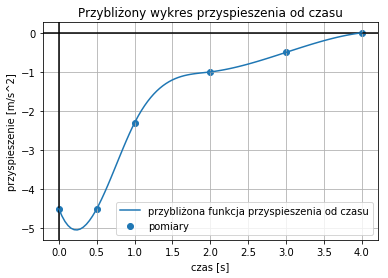

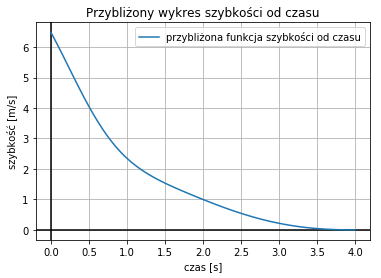

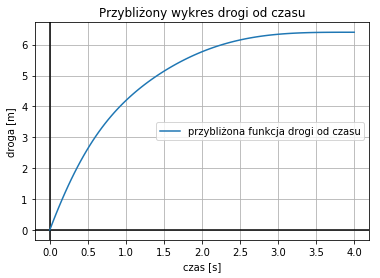

In [83]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

czas = [0.0,0.5,1.0,2.0,3.0,4.0]
przyspieszenie = [-4.5,-4.5,-2.3,-1.0,-0.5,0.0]

a_t = interpolate.interp1d(czas, przyspieszenie, kind='cubic')
v_0 = -zloz_simpson(a_t,0,czas[len(czas)-1], 1000)
v_t = lambda t: v_0 + zloz_simpson(a_t,0,t,50)
s_t = lambda t: zloz_simpson(v_t,0,t,20)

print("Droga hamowania pojazdu:",s_t(czas[len(czas)-1]),"m")
print("Średnia prędkość samochodu w przedziale  t=[0,0.5]:",(s_t(0.5)/0.5),"m/s")

x = np.linspace(0.0,4.0,100)
plt.figure()
plt.title("Przybliżony wykres przyspieszenia od czasu")
plt.grid()
plt.xlabel('czas [s]')
plt.ylabel('przyspieszenie [m/s^2]')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.scatter(czas, przyspieszenie, label="pomiary")
plt.plot(x, a_t(x), label="przybliżona funkcja przyspieszenia od czasu")
plt.legend()
plt.show()

plt.figure()
plt.title("Przybliżony wykres szybkości od czasu")
plt.grid()
plt.xlabel('czas [s]')
plt.ylabel('szybkość [m/s]')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
results = []
for i in x:
    results.append(v_t(i))
plt.plot(x, results, label="przybliżona funkcja szybkości od czasu")
plt.legend()
plt.show()

plt.figure()
plt.title("Przybliżony wykres drogi od czasu")
plt.grid()
plt.xlabel('czas [s]')
plt.ylabel('droga [m]')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
results = []
for i in x:
    results.append(s_t(i))
plt.plot(x, results, label="przybliżona funkcja drogi od czasu")
plt.legend()
plt.show()

**Zadanie 4.**

In [84]:
#A = 0.1
#T = 0.2
#f = lambda x : A*math.sin((2*math.pi*x)/T)
#df = lambda x : ((2*A*math.pi)/T)*math.cos((2*math.pi*x)/T)
df = lambda x : (math.pi*math.cos(10*math.pi*x))
dL = lambda x : math.sqrt(1+df(x)**2)
l = 4.8

print("Metoda złożona trapezów:",zloz_trapezy(dL,0,l,20))
print("Metoda złożona Simpsona:",zloz_simpson(dL,0,l,10))
print("Metoda Romberga:",romberg(dL,0,l))

Metoda złożona trapezów: 11.08498453462342
Metoda złożona Simpsona: 11.084984534623418
Metoda Romberga: 15.825159885482952


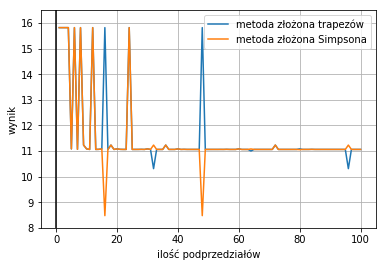

In [92]:
x = np.linspace(1,100,100,dtype=int)
trap = []
simp = []
for i in x:
    trap.append(zloz_trapezy(dL,0,l,i))
    simp.append(zloz_simpson(dL,0,l,i))

plt.figure()
plt.ylim(8,16.5)
plt.grid()
plt.xlabel('ilość podprzedziałów')
plt.ylabel('wynik')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x, trap, label="metoda złożona trapezów")
plt.plot(x, simp, label="metoda złożona Simpsona")
plt.legend()
plt.show()

- Metody trapezów i Simpsona dały bardzo podobny wynik, za to wynik uzyskany metodą Romberga znacznie od nich odstaje.
- Im większa ilość podprzedziałów tym dokładniejszy jest wynik.